In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import giddy

/home/matthewdicicco38/.local/lib/python3.9/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


Text(0, 0.5, 'Number of Up and Down Steps')

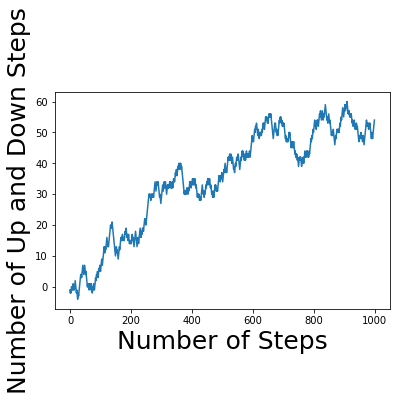

In [3]:
#Random Walk Example

start = 0
val = []
n = 1000  #can modify this vale so that we can see what happens over different spans of time
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    val.append(start)
    
plt.plot(val)
plt.xlabel('Number of Steps',fontsize=25)
plt.ylabel(r'Number of Up and Down Steps',fontsize=25)

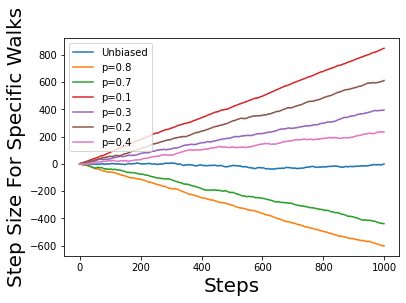

In [4]:
#Biased Random Walk
#These are all some of the possible biased random walks
p = [[0.5,0.5],[0.8,0.2],[0.7,0.3],[0.1,0.9],[0.3,0.7],[0.2,0.8],[0.4,0.6]]
p_s = ['Unbiased','p=0.8','p=0.7','p=0.1','p=0.3','p=0.2','p=0.4']
n = 1000 #can change where 
val = []
for pair in p:
    x_y = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=pair)
        start = start + step
        x_y.append(start)
    val.append(x_y)
    
i=0

for x in val:
    plt.plot(x, label = p_s[i])
    i=i+1
plt.xlabel('Steps',fontsize=20)
plt.ylabel('Step Size For Specific Walks',fontsize=20)
plt.legend()

             Count
Final State       
3            50019
5            25005
1            24976


Text(0, 0.5, 'Normalized Count')

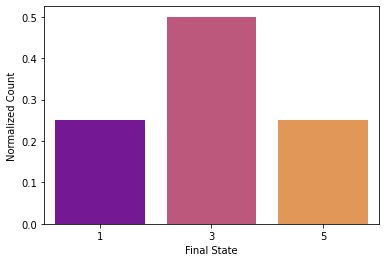

In [5]:
#Gamblers Ruin Problem

def GamblersProblem(start,first,last,n):
    for k in range(n):
            step = np.random.choice([-1,1],p=[0.5,0.5])
            start = start + step
    
    if(start==first):
        return first
    elif(start==last):
        return last
    else:
        return start

state_list = []
for i in range(100000):
    #start in state 3, broke state is 0, winning state is 5, 2 time steps
    state_list.append(GamblersProblem(3,0,5,2))
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
print(data_occ)
data_occ['Count'] = data_occ['Count']/100000
sns.barplot(x=data_occ.index,y=data_occ['Count'],palette='plasma')
plt.ylabel('Normalized Count')

In [6]:
#Markov Chain
#States 1,2,3 are transient
#States 4,5 are recurrent
state_1 = [0.7,0.2,0.1,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.6,0.4]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.7, 0.2, 0.1, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.6, 0.4]])

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


Text(0.5, 0, 'Steps')

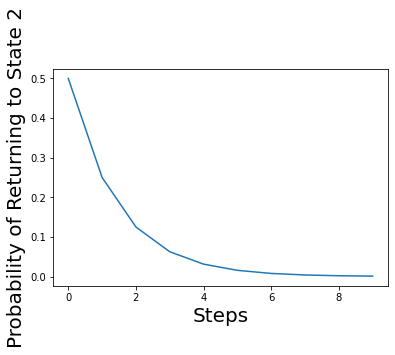

In [7]:
#Evaluating state 2 and what its probability of returning to state 2
#after n iterations is
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    new_matrix=[]
    for s in step:
        v = 0.5**s
        y.append(v)
    print(y)
    return y

plt.plot(t(10))
plt.ylabel('Probability of Returning to State 2',fontsize=20)
plt.xlabel('Steps',fontsize=20)



[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07]


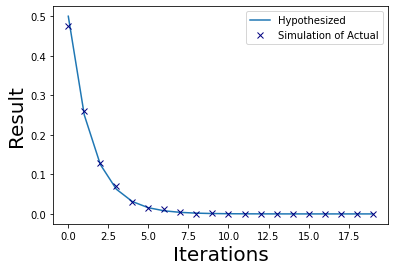

In [8]:
#Verifying that once entered state 2, that over time we will not be in
#this state anymore

def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2 
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    return state_collection.sum()/n

def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

p_20 = p(20)
plt.plot(t(20),label='Hypothesized')
plt.plot(p_20,'x',label='Simulation of Actual',color='navy')
plt.ylabel('Result',fontsize=20)
plt.xlabel('Iterations',fontsize=20)
plt.legend()

[[0.7 0.2 0.1 0.  0. ]]
[[0.49 0.24 0.27 0.   0.  ]]
[[0.343 0.218 0.439 0.    0.   ]]
[[0.2401 0.1776 0.5823 0.     0.    ]]
[[0.16807 0.13682 0.69511 0.      0.     ]]
[[0.117649 0.102024 0.780327 0.       0.      ]]
[[0.0823543 0.0745418 0.8431039 0.        0.       ]]
[[0.05764801 0.05374176 0.88861023 0.         0.        ]]
[[0.04035361 0.03840048 0.92124591 0.         0.        ]]
[[0.02824752 0.02727096 0.94448151 0.         0.        ]]


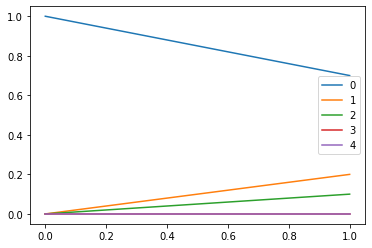

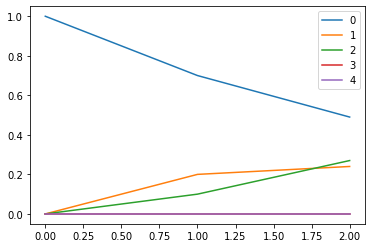

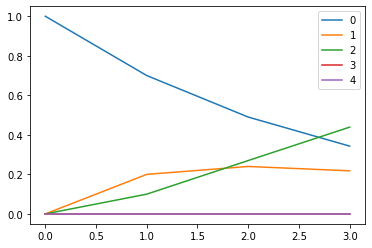

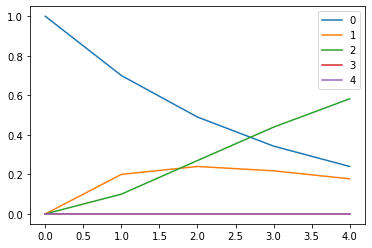

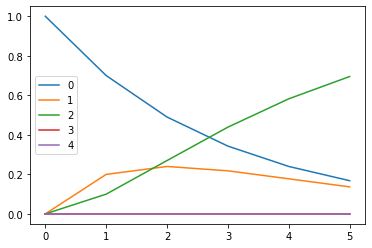

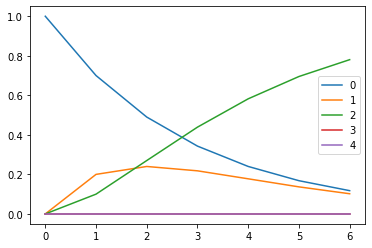

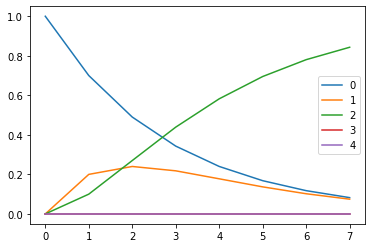

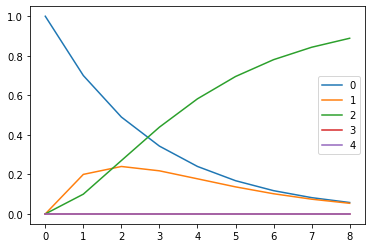

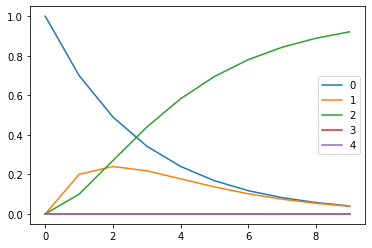

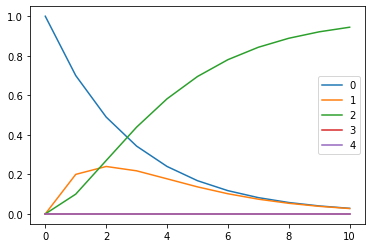

In [9]:
same_trans=trans_matrix
evaluator=np.array([[1.0, 0.0, 0.0, 0.0, 0.0]])

states=evaluator
this = [[0,0,0,0,0]]
for i in range(10):  #can set this value to whatever step size you desire
    evaluator = np.dot(evaluator, same_trans)
    print(evaluator)
    states=np.append(states,evaluator, axis=0)
    this=pd.DataFrame(states)
    this.plot()
    
plt.show()

In [14]:
'''state_1 = [0.7,0.2,0.1,0.0,0.0]
state_2 = [0.0,0.5,0.5,0.0,0.0]
state_3 = [0.0,0.0,1.0,0.0,0.0]
state_4 = [0.0,0.0,0.0,0.0,1.0]
state_5 = [0.0,0.0,0.0,0.6,0.4]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)


same_trans=giddy.markov.Markov(trans_matrix)
#print(same_trans.classes.tolist())
'''
#in construction

The Markov Chain is reducible and is composed by:
1 Recurrent class (indices):
[3]
5 Transient classes (indices):
[6], [2], [5], [0 4 7], [1]
The Markov Chain has 1 absorbing state (index):
[3]
